In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_csv("/content/sample_data/UNSW_NB15_training-set.csv")
test_df = pd.read_csv("/content/sample_data/UNSW_NB15_testing-set.csv")

In [ ]:
data= pd.concat([train_df,test_df], ignore_index=True)

In [ ]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,None,INT,2,0,496,0,90909.0902,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,2,0.000008,udp,None,INT,2,0,1762,0,125000.0003,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,3,0.000005,udp,None,INT,2,0,1068,0,200000.0051,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,4,0.000006,udp,None,INT,2,0,900,0,166666.6608,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,5,0.000010,udp,None,INT,2,0,2126,0,100000.0025,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33081 entries, 0 to 33080
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 33081 non-null  int64  
 1   dur                33081 non-null  float64
 2   proto              33081 non-null  object 
 3   service            33081 non-null  object 
 4   state              33081 non-null  object 
 5   spkts              33081 non-null  int64  
 6   dpkts              33081 non-null  int64  
 7   sbytes             33081 non-null  int64  
 8   dbytes             33081 non-null  int64  
 9   rate               33081 non-null  float64
 10  sttl               33081 non-null  int64  
 11  dttl               33080 non-null  float64
 12  sload              33080 non-null  float64
 13  dload              33080 non-null  float64
 14  sloss              33080 non-null  float64
 15  dloss              33080 non-null  float64
 16  sinpkt             330

In [ ]:
data["attack_cat"].value_counts()

Normal            15260
Generic            6051
Exploits           5723
DoS                2922
Reconnaissance     1737
Fuzzers            1011
Shellcode           155
Analysis            151
Backdoor             49
Worms                20
Name: attack_cat, dtype: int64

In [ ]:
data["label"].value_counts()

1.0    17819
0.0    15260
Name: label, dtype: int64

In [ ]:
numerical_cols = data.select_dtypes(exclude=["object"]).columns
numerical_cols

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [ ]:
data[numerical_cols] = data[numerical_cols].fillna(0)

In [ ]:
categorical_cols = data.select_dtypes(include=["object"]).columns

categorical_cols

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

In [ ]:
# one-hot-encoding categorical columns
data= pd.get_dummies(data,columns=['proto','service','state'],prefix="",prefix_sep="")
print(data.shape)

(33081, 196)


In [ ]:
data = data.drop(columns=['attack_cat'])


In [ ]:

X= data.drop('label', axis=1)
y= data['label']


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dropout, BatchNormalization, Dense

In [ ]:

# Step 2: Split the data
# Assuming you have your labels in a separate DataFrame or numpy array (e.g., y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#print(X_train.shape,'\n',X_test.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], 1)))  # 64 is the number of GRU units
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid activation for binary classification


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12929 (50.50 KB)
Trainable params: 12929 (50.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Step 4: Train the GRU model
model.fit(X_train, y_train, epochs=4, batch_size=32)



Epoch 1/4
827/827 [==============================] - 46s 55ms/step - loss: 0.3368 - accuracy: 0.8400
Epoch 2/4
827/827 [==============================] - 42s 51ms/step - loss: 0.2458 - accuracy: 0.8762
Epoch 3/4
827/827 [==============================] - 43s 51ms/step - loss: 0.2323 - accuracy: 0.8858
Epoch 4/4
827/827 [==============================] - 51s 62ms/step - loss: 0.2238 - accuracy: 0.8917


In [ ]:
# predicting target attribute on testing dataseta
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

207/207 [==============================] - 4s 20ms/step - loss: 0.2114 - accuracy: 0.9098
Test results - Loss: 0.21136415004730225 - Accuracy: 90.9777820110321%


In [ ]:
y_pred = model.predict(X_test)


207/207 [==============================] - 5s 23ms/step


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:


# calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred.round())
print('Confusion Matrix: \n', confusion_mat)

Confusion Matrix: 
 [[2623  462]
 [ 135 3397]]


In [ ]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      3085
         1.0       0.88      0.96      0.92      3532

    accuracy                           0.91      6617
   macro avg       0.92      0.91      0.91      6617
weighted avg       0.91      0.91      0.91      6617



AUC: 0.91


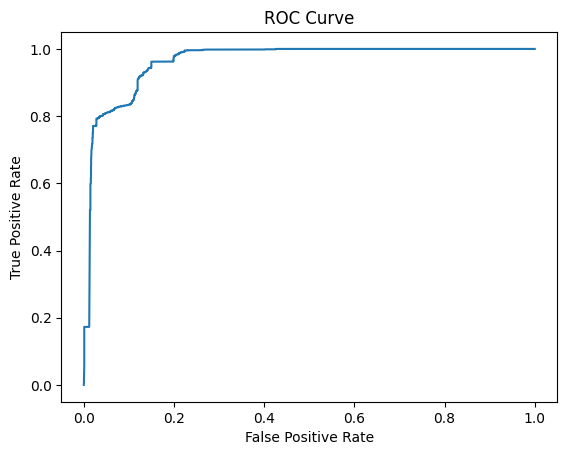

In [ ]:
# Calculate the ROC Precision, Recall, and F1-Score
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred.round())
print('AUC: %.2f' % auc)

# Calculate the ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# plot the roc curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()